C:\Users\Mohammed Saif Wasay\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


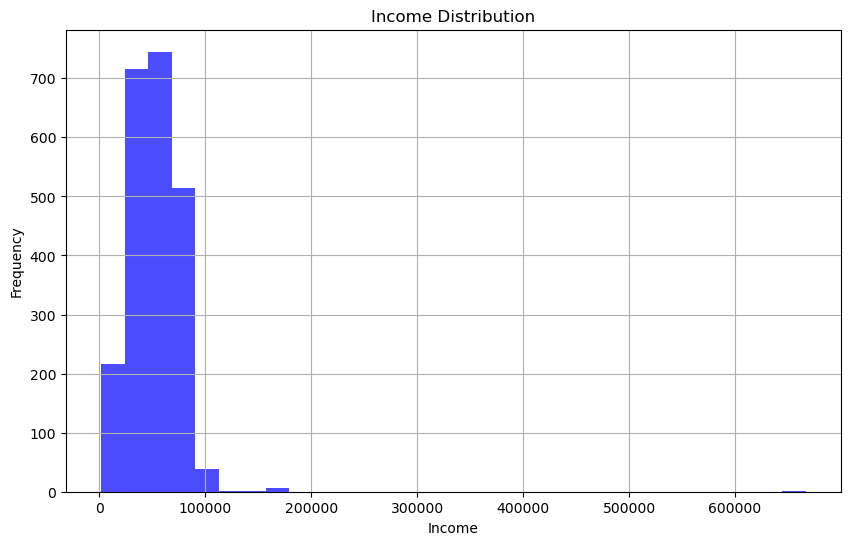

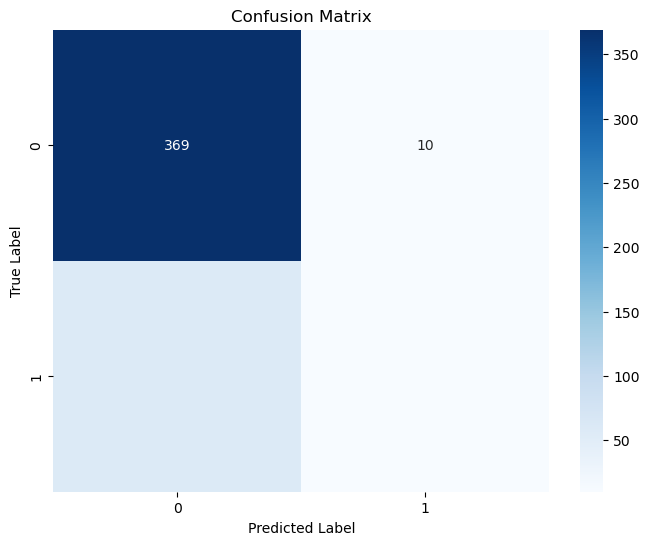

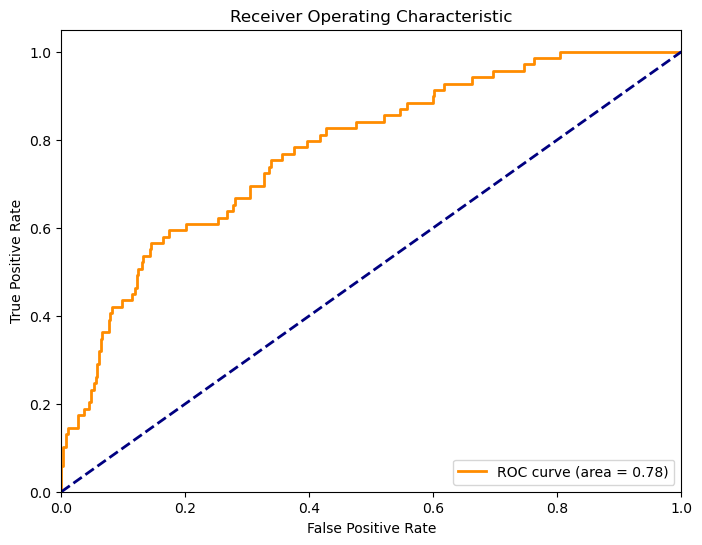

[[369  10]
 [ 59  10]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       379
           1       0.50      0.14      0.22        69

    accuracy                           0.85       448
   macro avg       0.68      0.56      0.57       448
weighted avg       0.81      0.85      0.81       448

                   Feature  Coefficient  Absolute_Coefficient
15       NumStorePurchases    -0.148727              0.148727
16       NumWebVisitsMonth     0.134493              0.134493
14     NumCatalogPurchases     0.061391              0.061391
17            AcceptedCmp3     0.060573              0.060573
13         NumWebPurchases     0.052505              0.052505
19            AcceptedCmp5     0.051947              0.051947
4                 Teenhome    -0.051503              0.051503
20            AcceptedCmp1     0.048430              0.048430
32   Marital_Status_Single     0.038923              0.038923
31  Marital_Status_Married    

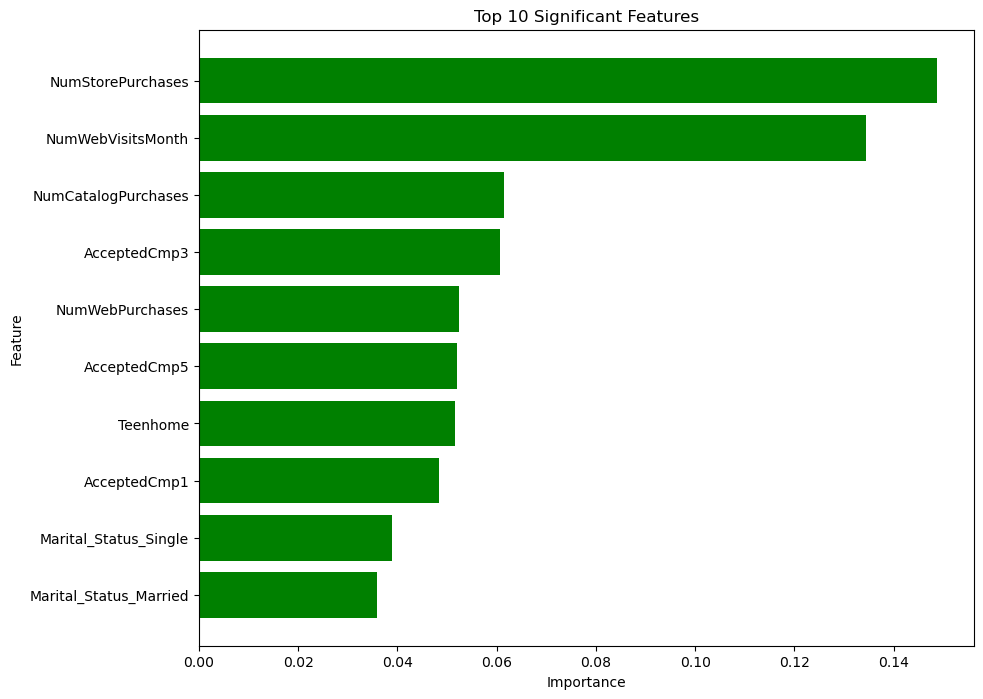

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder

# Load data
data = pd.read_excel('marketing_campaign1.xlsx')

# Data Cleansing
# Handle missing values
data['Income'].fillna(data['Income'].median(), inplace=True)

# Convert data types
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

# Remove redundant columns
data.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

# Encode categorical variables
encoder = OneHotEncoder(sparse=False)
encoded_columns = encoder.fit_transform(data[['Education', 'Marital_Status']])
encoded_col_names = encoder.get_feature_names_out(['Education', 'Marital_Status'])
encoded_df = pd.DataFrame(encoded_columns, columns=encoded_col_names)
data = data.join(encoded_df)
data.drop(['Education', 'Marital_Status'], axis=1, inplace=True)

# Handle DateTime
data['Year_Customer'] = data['Dt_Customer'].dt.year
data['Month_Customer'] = data['Dt_Customer'].dt.month
data['Day_Customer'] = data['Dt_Customer'].dt.day
data.drop('Dt_Customer', axis=1, inplace=True)

# Exploratory Data Analysis Visualization
plt.figure(figsize=(10, 6))
plt.hist(data['Income'], bins=30, color='blue', alpha=0.7)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Modeling
# Split the dataset
X = data.drop('Response', axis=1)
y = data['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a logistic regression model
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Analyze coefficients
coefficients = model.coef_[0]
features = X.columns
coefficients_df = pd.DataFrame(data={'Feature': features, 'Coefficient': coefficients})
coefficients_df['Absolute_Coefficient'] = np.abs(coefficients_df['Coefficient'])
significant_features = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)


print(conf_matrix)
print(class_report)
print(significant_features.head(10))

# Feature Importance Visualization
plt.figure(figsize=(10, 8))
top_features = significant_features.head(10)
plt.barh(top_features['Feature'], top_features['Absolute_Coefficient'], color='green')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Significant Features')
plt.gca().invert_yaxis()
plt.show()

